<h1> IRIS EDA

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")


In [27]:
iris=pd.read_csv('iris.csv')

In [28]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [30]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [31]:
iris1=iris.drop("Id", axis=1)

In [32]:
iris1.columns= ['sepal_length', 'sepal_width' , 'petal_length', 'petal_width','species']

In [34]:
iris1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
iris1.sample(3)

,sepal_length,sepal_width,petal_length,petal_width,species,Species
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
129,7.2,3.0,5.8,1.6,Iris-virginica,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica


In [37]:
iris1['Species']=iris['Species'].astype('category')
iris1.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species           object
Species         category
dtype: object

In [38]:
print(iris1.Species.unique())

[Iris-setosa, Iris-versicolor, Iris-virginica]
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]


In [39]:
print(iris1['Species'].value_counts())
iris2=pd.DataFrame(iris['Species'].value_counts())
iris2

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


,Species
Iris-virginica,50
Iris-versicolor,50
Iris-setosa,50


In [43]:
iris1.shape

(150, 6)

In [44]:
iris1.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [69]:
iris1.size

900

In [68]:
iris1.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
Species         0
dtype: int64

In [46]:
iris1.min()

sepal_length            4.3
sepal_width               2
petal_length              1
petal_width             0.1
species         Iris-setosa
Species         Iris-setosa
dtype: object

In [47]:
iris1.max()

sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
Species         Iris-virginica
dtype: object

In [48]:
iris1.median()

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

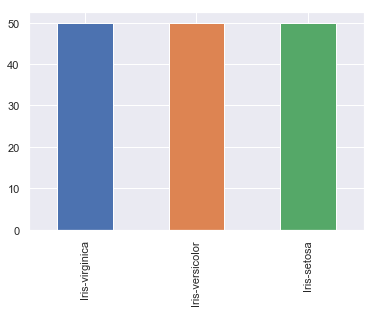

In [100]:
iris1['Species'].value_counts().plot(kind="bar");

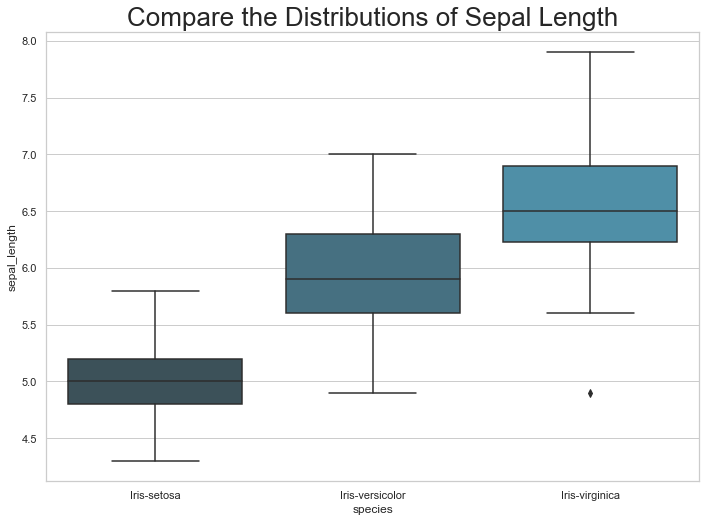

In [50]:
sns.set(style="whitegrid", palette="GnBu_d", rc={'figure.figsize':(11.7,8.27)})

title="Compare the Distributions of Sepal Length"

sns.boxplot(x="species", y="sepal_length", data=iris1)

# increasing font size
plt.title(title, fontsize=26)
# Show the plot
plt.show()

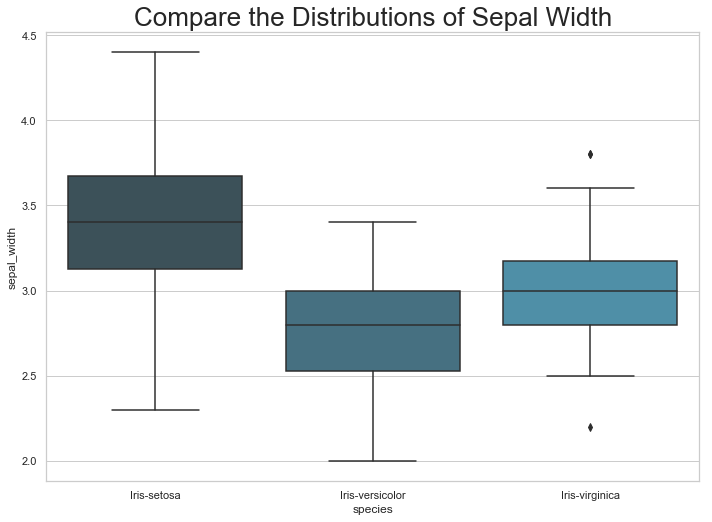

In [51]:
title="Compare the Distributions of Sepal Width"

sns.boxplot(x="species", y="sepal_width", data=iris1)

# increasing font size
plt.title(title, fontsize=26)
# Show the plot
plt.show()

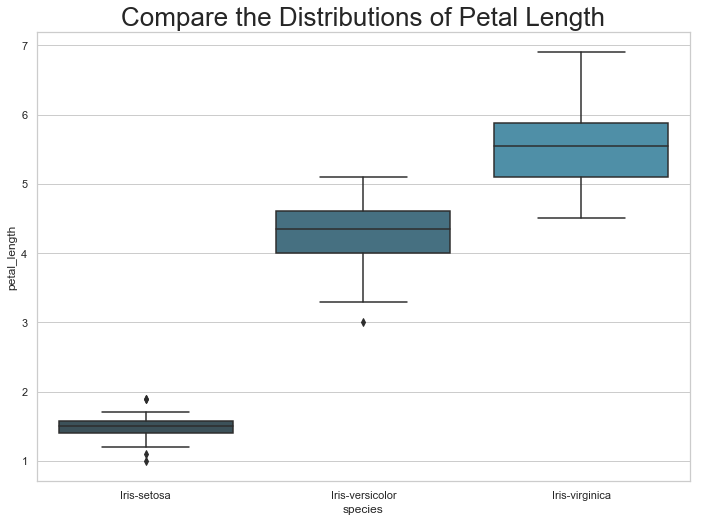

In [52]:
title="Compare the Distributions of Petal Length"

sns.boxplot(x="species", y="petal_length", data=iris1)

# increasing font size
plt.title(title, fontsize=26)
# Show the plot
plt.show()

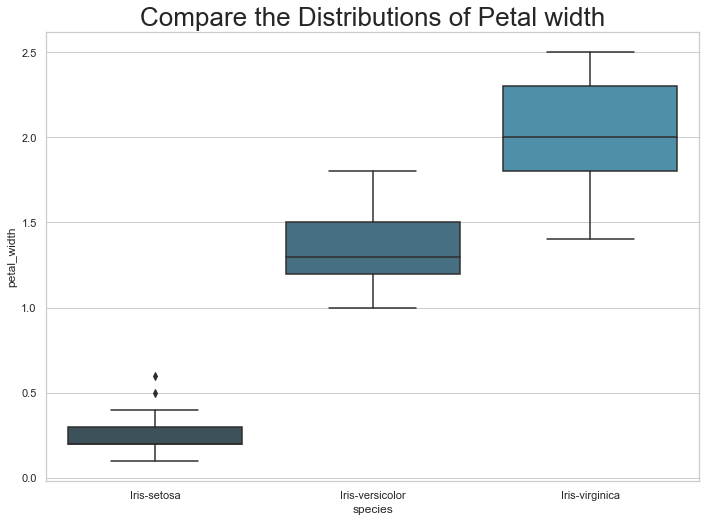

In [53]:
title="Compare the Distributions of Petal width"

sns.boxplot(x="species", y="petal_width", data=iris1)

# increasing font size
plt.title(title, fontsize=26)
# Show the plot
plt.show()

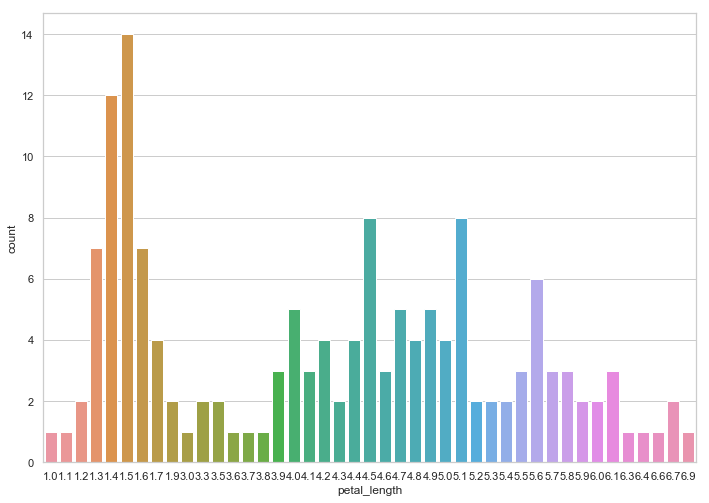

In [58]:
sns.countplot(x='petal_length', data = iris1)

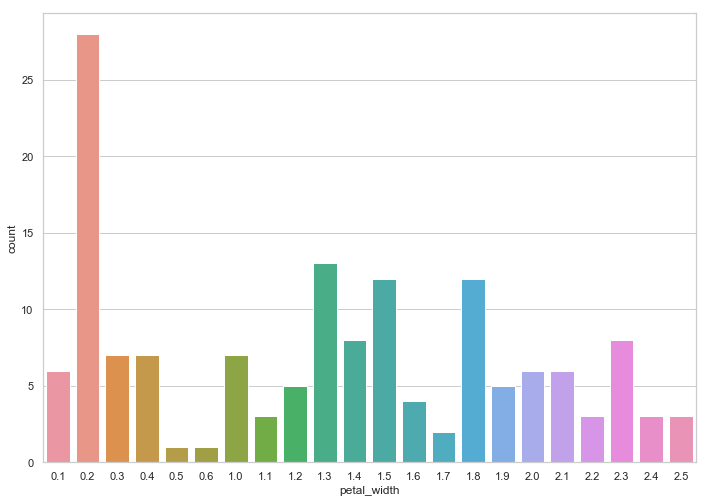

In [59]:
sns.countplot(x='petal_width', data = iris1)

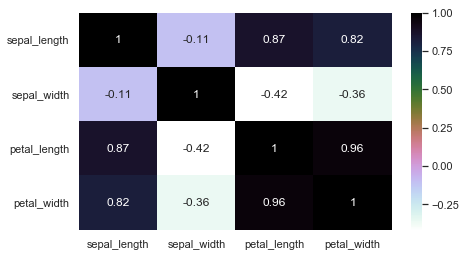

In [71]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris1.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [62]:
corr = iris1.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


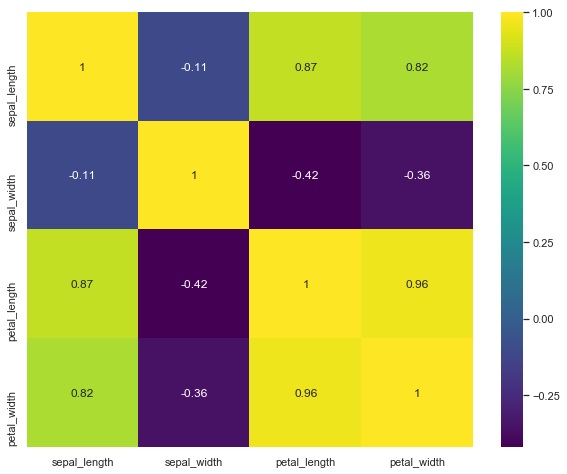

In [63]:
# import correlation matrix to see parametrs which best correlate each other
# According to the correlation matrix results Petal LengthCm and
#PetalWidthCm have positive correlation which is proved by the scatter plot discussed above

import seaborn as sns
import pandas as pd
corr = iris1.corr()
plt.figure(figsize=(10,8)) 
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap='viridis', annot=True)
plt.show()

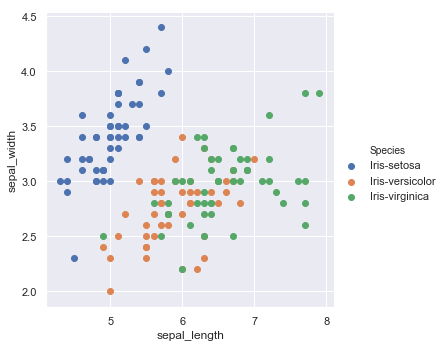

In [104]:
# Modify the graph above by assigning each species an individual color.
sns.FacetGrid(iris1, hue="Species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
plt.show()

In [86]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


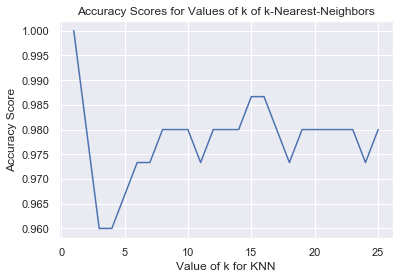

In [89]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [93]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.96


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [94]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [95]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.9833333333333333


In [96]:
Model = GaussianNB()
Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [98]:

Model = DecisionTreeClassifier()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [103]:
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train,y_train)
y_pred=Model.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95
